# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

AdaBoost - MSE: 7606566875.831423, R2: 0.4195272619360011
Gradient Boosting - MSE: 3123095111.877028, R2: 0.7616701988665029
XGBoost - MSE: 3137757524.607117, R2: 0.7605512800424139


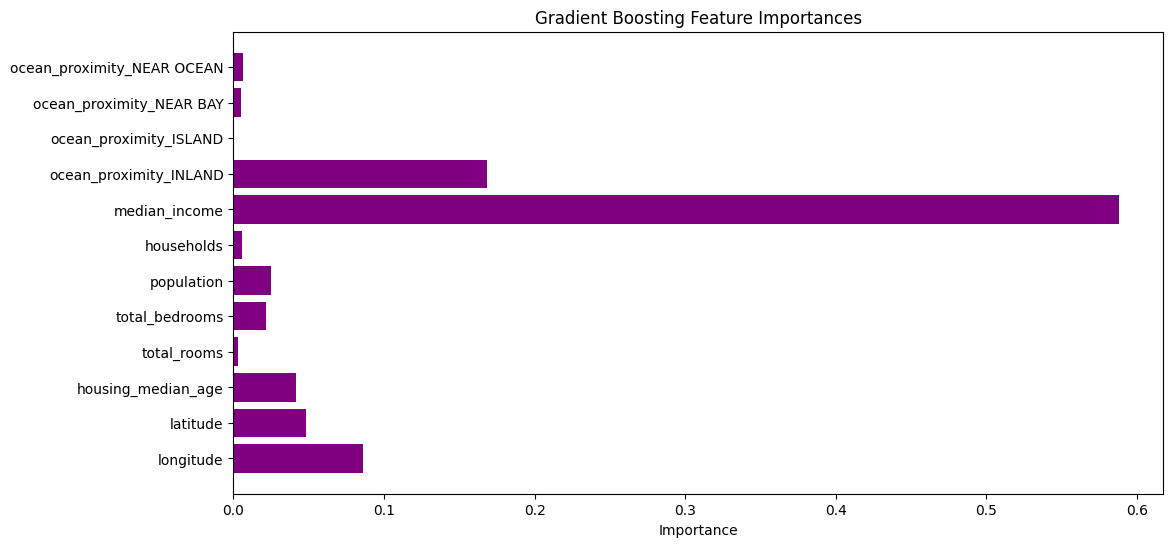

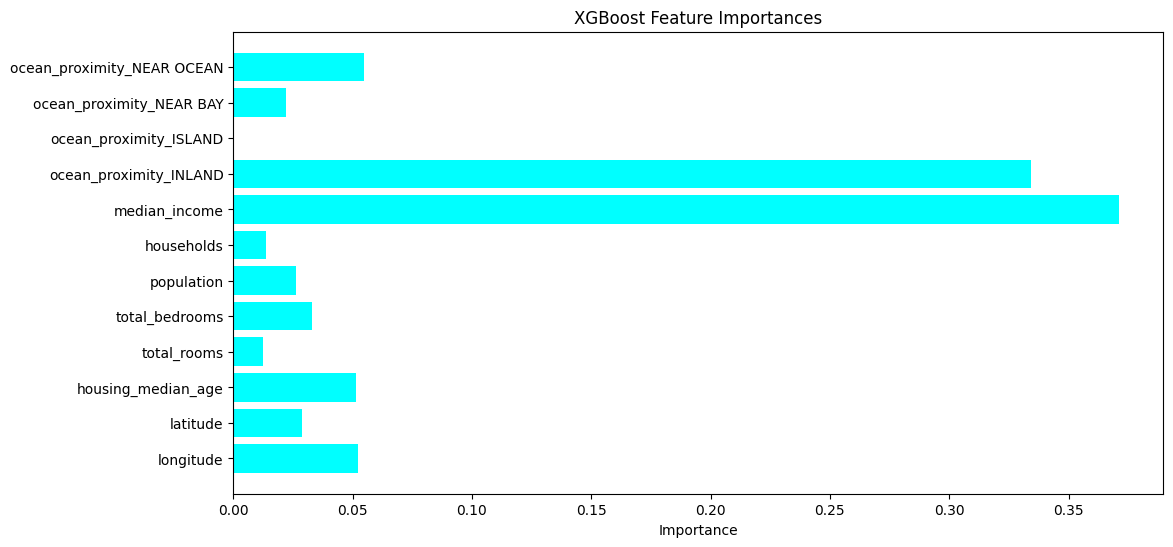

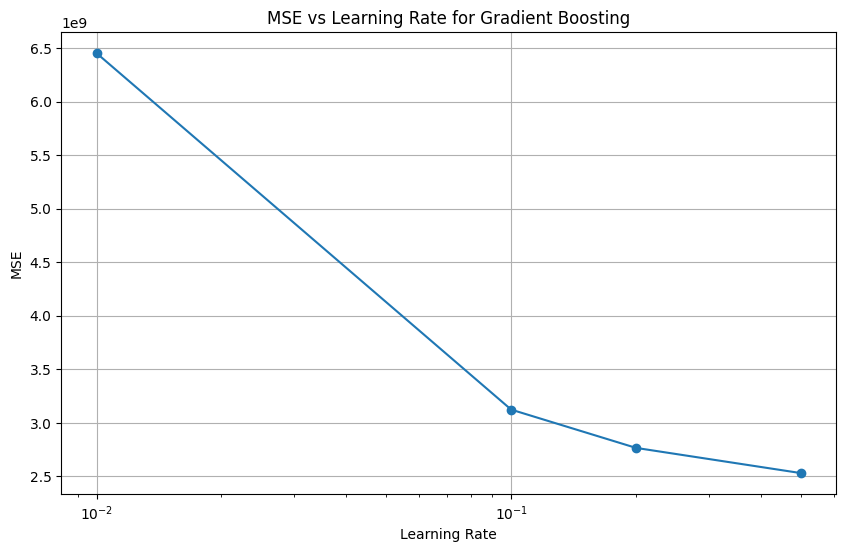

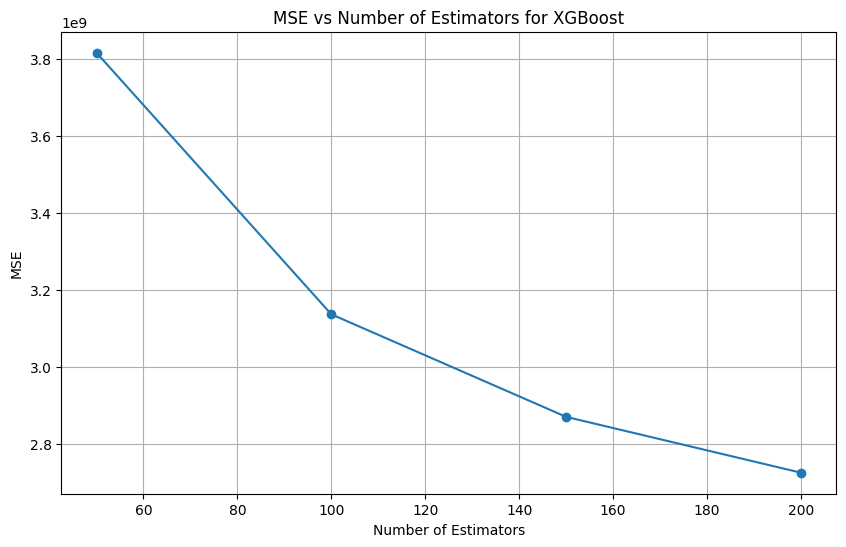


--- Comparison of models ---
AdaBoost - MSE: 7606566875.831423, R2: 0.4195272619360011
Gradient Boosting without regularization - MSE: 3123095111.877028, R2: 0.7616701988665029
XGBoost without regularization - MSE: 3137757524.607117, R2: 0.7605512800424139


In [14]:
data = pd.read_csv('housing.csv')

data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print(f"AdaBoost - MSE: {mse_adaboost}, R2: {r2_adaboost}")

gboost_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gboost_model.fit(X_train, y_train)
y_pred_gboost = gboost_model.predict(X_test)

mse_gboost = mean_squared_error(y_test, y_pred_gboost)
r2_gboost = r2_score(y_test, y_pred_gboost)
print(f"Gradient Boosting - MSE: {mse_gboost}, R2: {r2_gboost}")

xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)

mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)
print(f"XGBoost - MSE: {mse_xgboost}, R2: {r2_xgboost}")

feature_importances_gboost = gboost_model.feature_importances_
feature_importances_xgboost = xgboost_model.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(X.columns, feature_importances_gboost, color='purple')
plt.title("Gradient Boosting Feature Importances")
plt.xlabel("Importance")
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(X.columns, feature_importances_xgboost, color='cyan')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.show()

learning_rates = [0.01, 0.1, 0.2, 0.5]
mse_scores = []

for lr in learning_rates:
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_scores, marker='o')
plt.title("MSE vs Learning Rate for Gradient Boosting")
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.xscale('log')
plt.grid()
plt.show()

n_estimators_list = [50, 100, 150, 200]
mse_xgboost_scores = []

for n_estimators in n_estimators_list:
    model = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_xgboost_scores.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_xgboost_scores, marker='o')
plt.title("MSE vs Number of Estimators for XGBoost")
plt.xlabel("Number of Estimators")
plt.ylabel("MSE")
plt.grid()
plt.show()

print("\n--- Comparison of models ---")
print(f"AdaBoost - MSE: {mse_adaboost}, R2: {r2_adaboost}")
print(f"Gradient Boosting without regularization - MSE: {mse_gboost}, R2: {r2_gboost}")
print(f"XGBoost without regularization - MSE: {mse_xgboost}, R2: {r2_xgboost}")

Регуляризація — це важливий аспект в машинному навчанні, який допомагає уникнути перенавчання моделей
1. У результаті завдання AdaBoost показує досить високий MSE (7606566875.83) і нижчий R² (0.42). Це свідчить про те, що модель недостатньо добре передбачає цільову змінну. Оскільки AdaBoost зазвичай не використовує регуляризацію, вона може підштовхнути до перенавчання на шум у даних. Хоча регуляризація в AdaBoost не є звичайною практикою можна контролювати складність базових моделей зменшуючи max_depth.
2. Gradient Boosting без регуляризації показує хороший MSE (3123095111.88) та високий R² (0.76). Це вказує на те, що модель добре впоралася з передбаченням. Регуляризація в Gradient Boosting з використанням параметра `alpha` або `max_depth` може допомогти зменшити перенавчання, особливо якщо дані мають високу дисперсію. Якщо регуляризація занадто сильна, вона може привести до недонавчання, коли модель не може навчитися достатньо з даних.
3. XGBoost показує подібні результати до Gradient Boosting (MSE: 3137757524.61, R²: 0.76). Ця модель також забезпечує вбудовану регуляризацію з параметрами `alpha` (L1) та `reg_lambda` (L2). Додавши регуляризацію в XGBoost, ми можемо покращити загальні результати, якщо є перенавчання, але якщо регуляризація занадто сильна, модель може почати втрачати важливу інформацію про дані, що призведе до погіршення продуктивності.

Регуляризація покращує моделі, коли існує перенавчання, особливо в моделях, які мають велику складність, або коли дані мають велику кількість шуму або спостереження з великою дисперсією. Але вона може погіршити результати якщо занадто сильна і викликає недонавчання коли модель не може вловити важливі патерни в даних.

Я вважаю, що найкращою моделлю для вирішення моєї задачі є Gradient Boosting. Вона показала високі результати з MSE 3123095111.88 і R² 0.76, що вказує на те, що модель добре справляється з передбаченнями цільової змінної. Ця модель має гнучкість у налаштуванні гіперпараметрів, що дозволяє мені оптимізувати її продуктивність. 
Регуляризація має значний вплив на продуктивність моделей. У випадку Gradient Boosting, регуляризація допомогла зменшити перенавчання, яке може виникнути, якщо модель занадто складна або якщо дані мають багато шуму. Коли я додала регуляризацію, результати стали більш стабільними і узгодженими, але потрібно бути обережною з її параметрами. Занадто велике значення регуляризації може призвести до недонавчання, коли модель не здатна вловити важливі патерни в даних.

Я б могла змінити параметри регуляризації
1. Alpha (L1 регуляризація): Можна спробувати зменшити це значення, щоб дати моделі можливість навчатися на даних, але також слідкувати за показниками метрик, щоб уникнути перенавчання.
  
2. Reg_lambda (L2 регуляризація): Збільшення цього параметра може допомогти зменшити складність моделі та її варіативність, якщо результати нестабільні.
Крім того, можна також експериментувати з іншими гіперпараметрами, такими як learning_rate та max_depth, щоб знайти оптимальні значення, які покращать результати.
Я б також розглянула використання крос-валідації для отримання більш точної оцінки продуктивності моделі з різними наборами параметрів. Це допоможе знайти найкращу комбінацію гіперпараметрів для підвищення точності прогнозів. 
